In [1]:
import warnings
warnings.simplefilter(action='ignore',)

import numpy as np
import matplotlib.pyplot as plt

from qiskit import BasicAer, QuantumCircuit,execute
from qiskit.quantum_info import Operator
backend = BasicAer.get_backend("qasm_simulator")

from qiskit.visualization import plot_histogram

In [2]:
# QFT dagger

def phase_rotate(circuit, n):  
    if n == 0: return circuit    
    n = n-1
    circuit.h(n)    
    for qubit in range(n): circuit.cp(np.pi/2**(n-qubit), qubit, n)     
    phase_rotate(circuit, n)

def swap_registers(circuit, n):    
    for qubit in range(n//2): circuit.swap(qubit, n-qubit-1)

def qft_dagger(circuit, n): 
    qc = QuantumCircuit(n)
    phase_rotate(qc,n)
    swap_registers(qc,n)
    
    qc_dagger = qc.inverse()
    qft_dagger = qc_dagger.to_gate()
    qft_dagger.name = " QFT$^\dagger$ "
    circuit.append(qft_dagger, range(n))

#### Ex. T-gate: $\theta = \frac{1}{4}$

Note that QPE is QFT when $\theta=\frac{x}{2^n}2\pi$,

Prepare $q_0$ state as $|1\rangle $ because CP gate adds phase to $|1\rangle$.

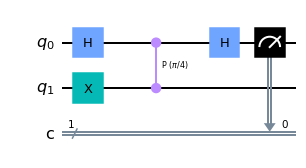

In [3]:
qc = QuantumCircuit(2,1)
qc.x(1)

qc.h(0)
qc.cp(np.pi/4,0,1)
qc.h(0)

qc.measure(0,0)
qc.draw(output="mpl")

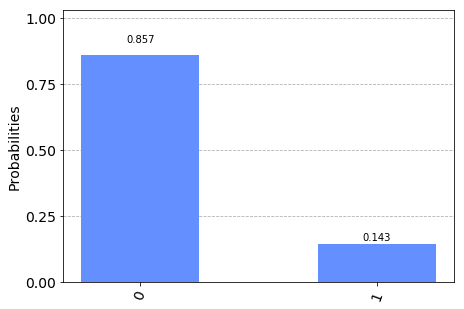

In [4]:
result = execute(qc, backend=backend,shots=1024).result()
plot_histogram(result.get_counts())

With 1 qubit, we can only say that phase is somewhere between 0 and $\pi$ (more closer to 0).

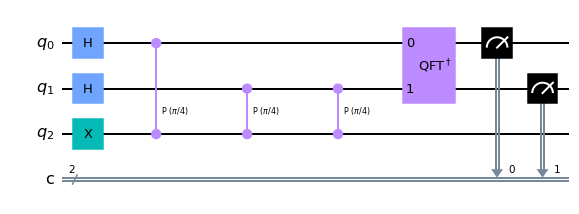

In [5]:
QUBITS = 2

qc = QuantumCircuit(QUBITS+1,QUBITS)
qc.x(QUBITS)

qc.h(range(QUBITS))

rep = 1
for i in range(QUBITS):
    for r in range(rep):
        qc.cp(np.pi/4,i,QUBITS)
    rep = rep*2
        
qft_dagger(qc, QUBITS)

for i in range(QUBITS): qc.measure(i,i)
qc.draw(output="mpl")

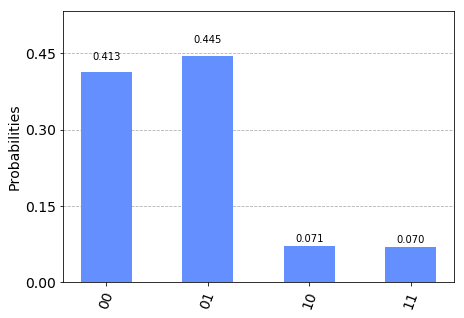

In [6]:
result = execute(qc, backend=backend,shots=1024).result()
plot_histogram(result.get_counts())

With 2 qubit, we can say that phase is somewhere between 0 and $\frac{1}{2}\pi$ (almost like the middle of them).

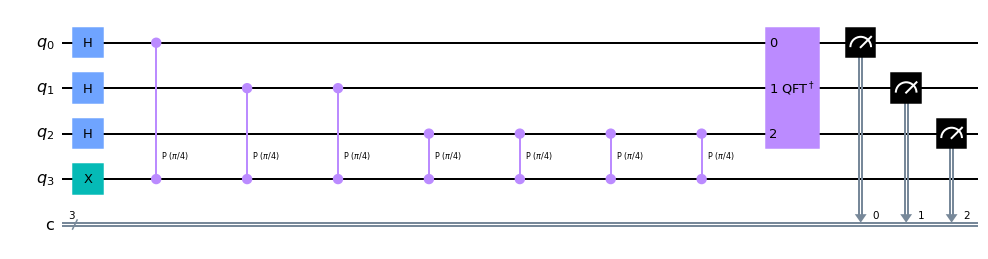

In [7]:
QUBITS = 3

qc = QuantumCircuit(QUBITS+1,QUBITS)
qc.x(QUBITS)

qc.h(range(QUBITS))

rep = 1
for i in range(QUBITS):
    for r in range(rep):
        qc.cp(np.pi/4,i,QUBITS)
    rep = rep*2
        
qft_dagger(qc, QUBITS)

for i in range(QUBITS): qc.measure(i,i)
qc.draw(output="mpl")

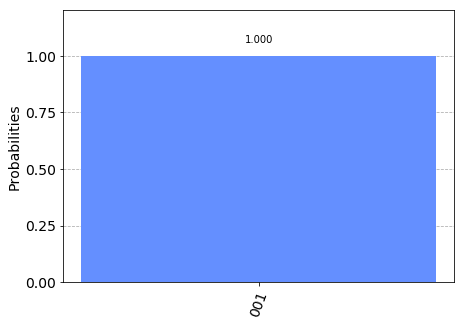

In [8]:
result = execute(qc, backend=backend,shots=1024).result()
plot_histogram(result.get_counts())

With 3 qubit, we can say that phase is $\frac{1}{4}\pi$.

#### Ex 2. $\theta=\frac{7}{13}\pi \approx 0.54\pi$ 

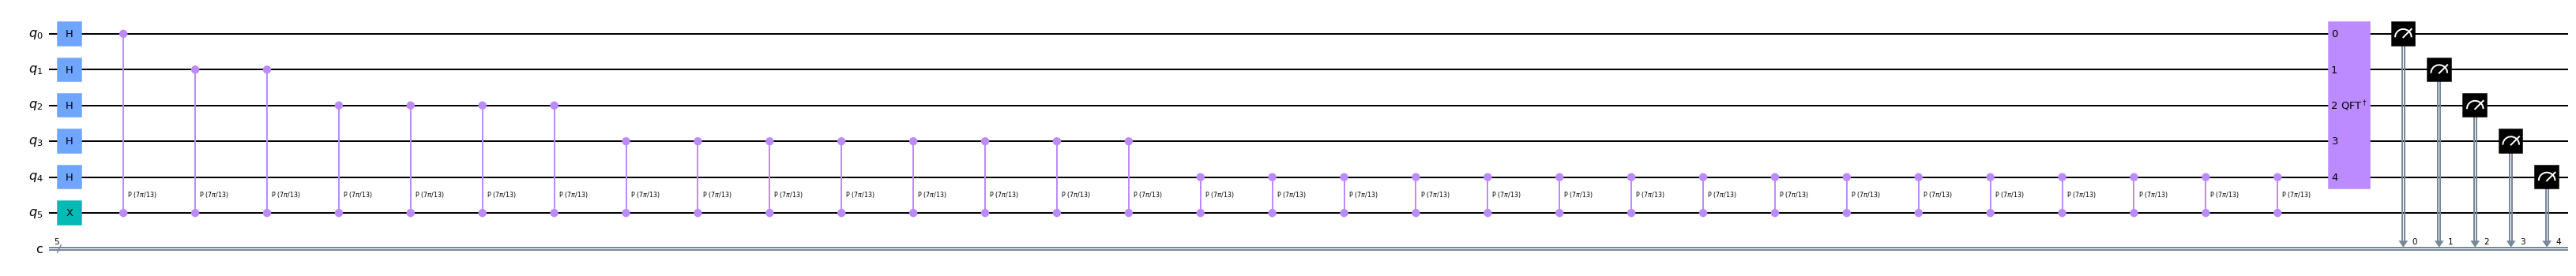

In [9]:
QUBITS = 5

qc = QuantumCircuit(QUBITS+1,QUBITS)
qc.x(QUBITS)

qc.h(range(QUBITS))

rep = 1
for i in range(QUBITS):
    for r in range(rep):
        qc.cp((7/13)*np.pi,i,QUBITS)
    rep = rep*2
        
qft_dagger(qc, QUBITS)

for i in range(QUBITS): qc.measure(i,i)
qc.draw(output="mpl", fold=-1)

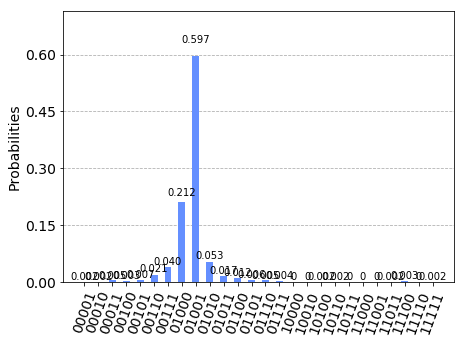

In [10]:
result = execute(qc, backend=backend,shots=1024).result()
plot_histogram(result.get_counts())

Phase is somewhere between $\frac{1}{2}\pi$ and $\frac{9}{16}\pi$ (between $0.5\pi$ and $0.5625\pi$, 
closer to $0.5625\pi$).

The more qubit you use, the more precise the estimate will be.